In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Generate XOR data
rng = np.random.RandomState(0)
X = 2.3 * rng.randn(400, 2) # scale the variance to make lt more similar to XOR data in Tensorflow
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
y= np.array([[1.0] if y == True else [0] for y in Y])

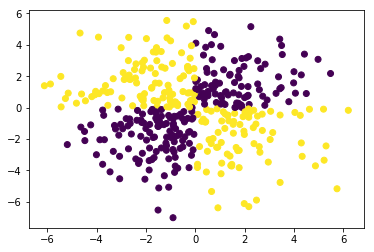

In [3]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [4]:
# Define activate function
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [5]:
class NeuralNetwork:
    def __init__(self, features, label):
        self.input = features
        self.weights1 = np.random.rand(self.input.shape[1],5)
        self.weights2 = np.random.rand(5,3)
        self.weights3 = np.random.rand(3,1)
        self.y = label
        self.learn_rate = 0.005
        self.output = np.zeros(label.shape)
    
    
    def forward_feed(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        self.output = sigmoid(np.dot(self.layer2, self.weights3))
    
    
    def back_prop(self):
        weights3_change = np.dot(self.layer2.T, (2*(self.y - self.output) \
                                                 * sigmoid_derivative(self.output)))
        weights2_change = np.dot(self.layer1.T, (np.dot(2*(self.y - self.output) \
                                                        * sigmoid_derivative(self.output), self.weights3.T)\
                                                 * sigmoid_derivative(self.layer2)))
        weights1_change = np.dot(self.input.T, np.dot((np.dot(2*(self.y - self.output) \
                                                        * sigmoid_derivative(self.output), self.weights3.T)\
                                                 * sigmoid_derivative(self.layer2)), self.weights2.T)\
                                * sigmoid_derivative(self.layer1))
        self.weights1 += self.learn_rate * weights1_change
        self.weights2 += self.learn_rate * weights2_change
        self.weights3 += self.learn_rate * weights3_change
        

In [6]:
# Trian the neural network
nn = NeuralNetwork(X,y)
for epoch in range(1024):
    nn.forward_feed()
    nn.back_prop()

In [7]:
pred = [1 if item[0] > 0.5 else 0 for item in nn.output]

In [8]:
acc = sum([a == b for a,b in zip(Y,pred)])/len(pred)
print('The prediction accuracy of my Neural Network(sigmoid) is {}'.format(acc))

The prediction accuracy of my Neural Network(sigmoid) is 0.99


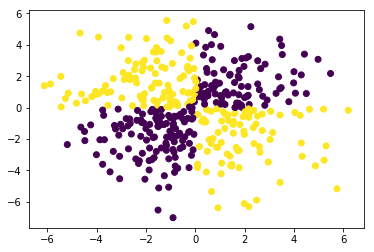

In [9]:
plt.scatter(X[:,0],X[:,1],c=pred)